<a href="https://colab.research.google.com/github/dijaben123/Analyse-des-sentiments/blob/main/housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import usefull libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle_token/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                      COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           8820        261  1.0              
mattop/alcohol-consumption-per-capita-2016                     Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            833         29  1.0              
thedevastator/jobs-dataset-from-glassdoor                      Salary Prediction                                     3MB  2022-11-16 13:52:31           5672        124  1.0              
swaptr/fifa-world-cup-2022-statistics                          FI

In [ ]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip", "r") as zip_ref:
    zip_ref.extractall("./datakaggle")

In [ ]:
!ls "./datakaggle/"

data_description.txt  sample_submission.csv  test.csv  train.csv


In [ ]:
data=pd.read_csv('./datakaggle/train.csv')

#Prétraitement de données

### Netoyage de train_Set

In [ ]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
data["Fence"].isna().sum()

1179

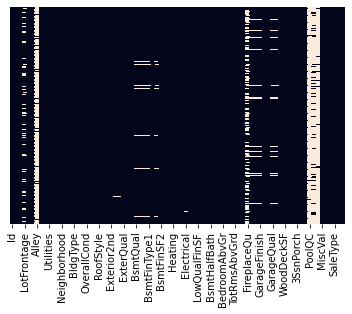

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [ ]:
data.shape

(1460, 81)

In [ ]:
## Fill Missing Values

data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [ ]:
data.drop(['Alley'],axis=1,inplace=True)

In [ ]:
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])

In [ ]:
data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])

In [ ]:
data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
data.shape

(1460, 76)

In [ ]:
data.drop(['Id'],axis=1,inplace=True)

In [ ]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])

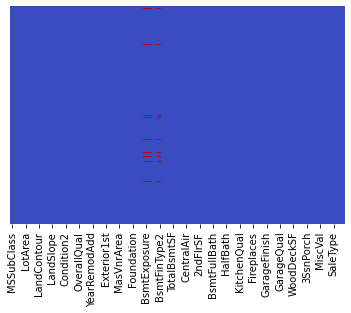

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

In [ ]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [ ]:
data.BsmtFinType2.isna().sum()

38

In [ ]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
data.columns[data.isnull().any()]

Index(['BsmtFinType1', 'BsmtFinType2', 'Electrical'], dtype='object')

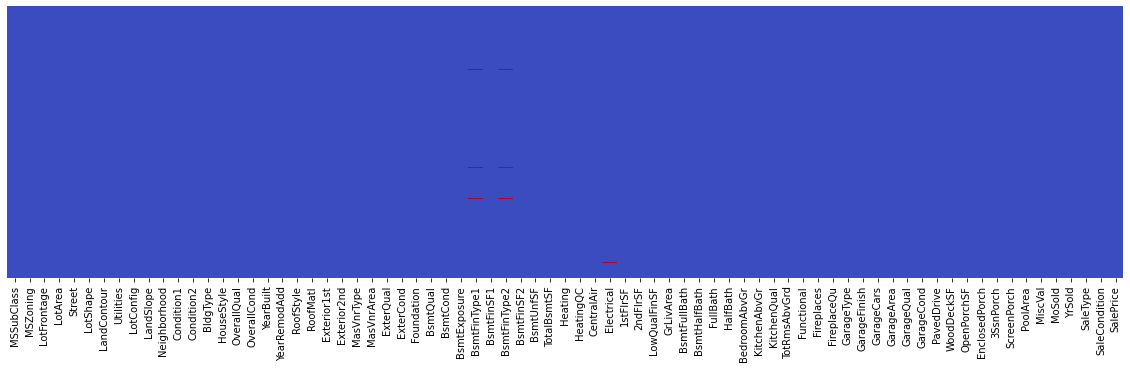

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm', ax=ax)

In [ ]:
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

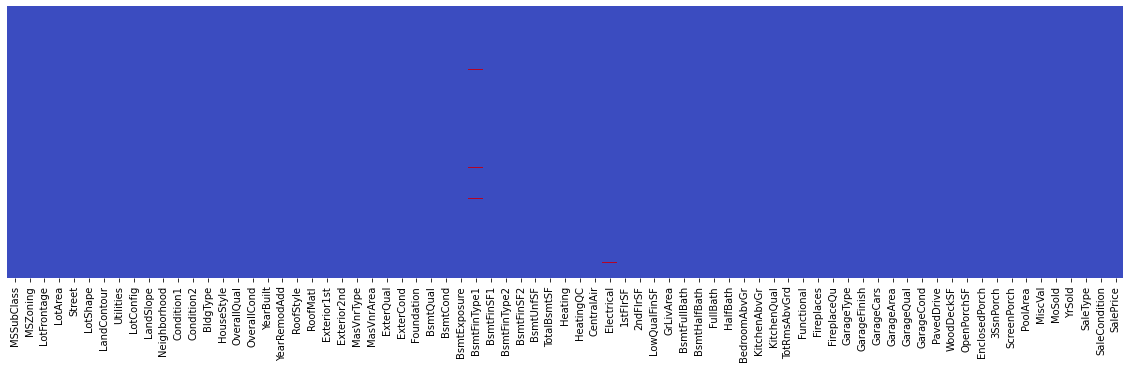

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm', ax=ax)

In [ ]:
data["BsmtFinType1"]

0       GLQ
1       ALQ
2       GLQ
3       ALQ
4       GLQ
       ... 
1455    Unf
1456    ALQ
1457    GLQ
1458    GLQ
1459    BLQ
Name: BsmtFinType1, Length: 1460, dtype: object

In [ ]:
data["BsmtFinType1"].isna().sum()

37

In [ ]:
data.dropna(inplace=True)

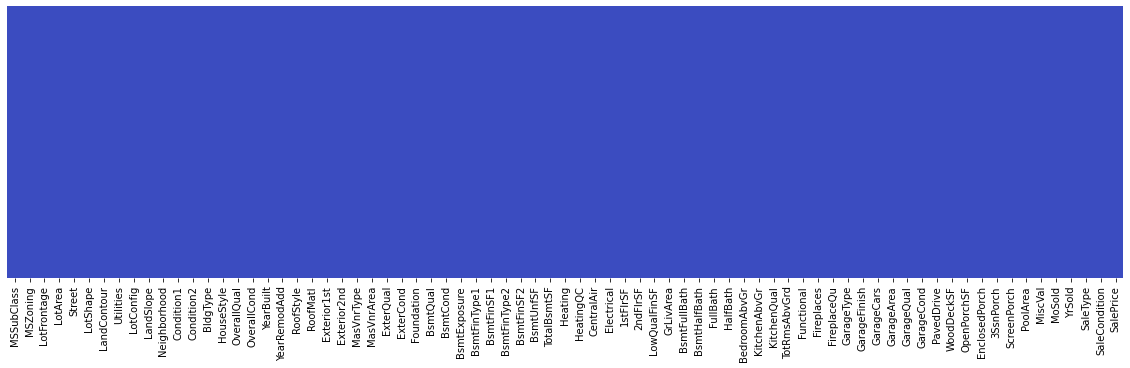

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm', ax=ax)

In [ ]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# rassemblement de tous les variables qualitatives
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
data[columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,...,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Norm,1Fam,...,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,1Fam,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,1Fam,...,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,...,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,...,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,1Fam,...,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,...,Y,FuseA,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y


In [ ]:
len(columns)

39

In [ ]:
# Suppression des variables qualitatives
data.drop(columns,axis=1,inplace=True)

In [ ]:
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Netoyage du Test_set




In [ ]:
Test_data=pd.read_csv('./datakaggle/test.csv')

In [ ]:
Test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

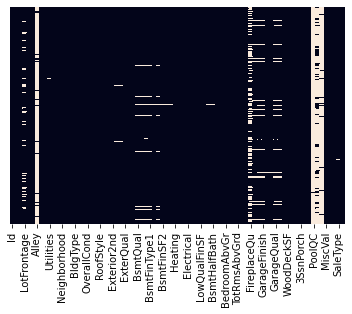

In [ ]:
#Test_data['MSZoning'].value_counts()
sns.heatmap(Test_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
Test_data.shape


(1459, 80)

In [ ]:
Test_data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [ ]:
## Fill Missing Values

Test_data['LotFrontage']=Test_data['LotFrontage'].fillna(Test_data['LotFrontage'].mean())

In [ ]:
Test_data.drop(['Alley'],axis=1,inplace=True)


In [ ]:
Test_data['BsmtCond']=Test_data['BsmtCond'].fillna(Test_data['BsmtCond'].mode()[0])
Test_data['BsmtQual']=Test_data['BsmtQual'].fillna(Test_data['BsmtQual'].mode()[0])
Test_data['FireplaceQu']=Test_data['FireplaceQu'].fillna(Test_data['FireplaceQu'].mode()[0])
Test_data['GarageType']=Test_data['GarageType'].fillna(Test_data['GarageType'].mode()[0])


In [ ]:
Test_data.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
Test_data['GarageFinish']=Test_data['GarageFinish'].fillna(Test_data['GarageFinish'].mode()[0])
Test_data['GarageQual']=Test_data['GarageQual'].fillna(Test_data['GarageQual'].mode()[0])
Test_data['GarageCond']=Test_data['GarageCond'].fillna(Test_data['GarageCond'].mode()[0])

In [ ]:
Test_data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
Test_data['MasVnrType']=Test_data['MasVnrType'].fillna(Test_data['MasVnrType'].mode()[0])
Test_data['MasVnrArea']=Test_data['MasVnrArea'].fillna(Test_data['MasVnrArea'].mode()[0])

In [ ]:
Test_data.drop(columns,axis=1,inplace=True)

In [ ]:
Test_data.shape

(1459, 36)

In [ ]:
Test_data["BsmtFullBath"].isna().sum()
Test_data["BsmtHalfBath"].isna().sum()


2

In [ ]:
Test_data['BsmtFullBath']=Test_data['BsmtFullBath'].fillna(Test_data['BsmtFullBath'].mean())
Test_data['BsmtHalfBath']=Test_data['BsmtHalfBath'].fillna(Test_data['BsmtHalfBath'].mean())

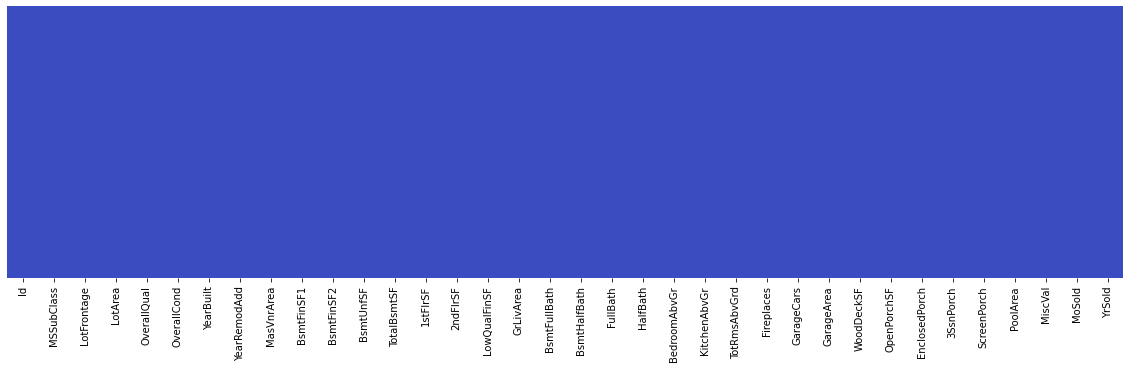

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))         # Sample figsize in inches
sns.heatmap(Test_data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm', ax=ax)

In [ ]:
test_copy=Test_data.copy()
test_copy.shape


(1459, 36)

In [ ]:
test_copy.drop(['Id'],axis=1,inplace=True)

In [ ]:
test_copy.shape

(1459, 35)

# Entrainer un modèle

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
# select X and y
y = data.loc[:,'SalePrice']
X = data.loc[:, data.columns != 'SalePrice']

Diviser la data set en train et test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(scaled_train, y_train)

LinearRegression()

In [ ]:
y_pred =model.predict(scaled_test)
y_pred

array([ 7.46724025e+15,  1.01020209e+15, -1.46669957e+16,  1.28205486e+15,
        7.23081103e+15,  7.88723034e+15,  4.19461717e+15, -7.30671850e+15,
       -7.79733901e+15,  4.08770348e+15, -4.18749429e+15,  5.65872943e+15,
       -1.28169867e+16, -8.03416211e+15, -9.51276550e+15, -1.13341180e+16,
       -3.33540073e+15,  3.96667634e+15, -1.26508467e+16, -2.07390503e+16,
        2.26534474e+15, -9.01974829e+15,  5.66793645e+15,  4.35659809e+14,
       -1.09875722e+16,  6.07451481e+15, -8.00014323e+15,  9.62426096e+15,
        7.51186877e+15, -6.19257619e+15,  1.18077785e+16, -9.67208910e+15,
        1.99911327e+15,  1.56661835e+15,  4.78280179e+15, -1.29892558e+16,
       -4.48305622e+15,  4.97835121e+15,  1.13106675e+16,  1.77577230e+15,
        6.27627991e+15,  5.59933695e+15, -3.12193638e+15,  5.02049506e+15,
       -1.27398818e+16,  3.52960523e+15, -1.53513942e+15, -9.36301960e+14,
        2.87567005e+15, -1.13431014e+16, -3.40774770e+15,  6.60249021e+15,
       -1.17659864e+16,  

In [ ]:

print(model.score(X_train,y_train))

-4.4938401084579e+28


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Evaluer le model

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
import math
rmse = math.sqrt(mse)
rmse

7078768459572369.0

In [ ]:
y_test

518     211000
538     158000
1318    275000
387     125000
59      124900
         ...  
419     142000
1359    315000
21      139400
746     236000
326     324000
Name: SalePrice, Length: 427, dtype: int64

## Modèle avancé

XGBoost

In [ ]:
# install xgboost
#! pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# create an xgboost regression model
pipeline = make_pipeline(StandardScaler(), XGBRegressor())

In [ ]:
pipeline.fit(X_train, y_train)

[00:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor', XGBRegressor())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(pipeline.score(X_train,y_train))
print(pipeline.score(X_test,y_test))

0.9630610236237012
0.8946575672830811


In [ ]:
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse

24157.164583112255

In [ ]:
y_pred

array([193405.3  , 138965.5  , 263104.4  , 142265.19 , 121747.42 ,
       161084.95 , 114980.28 , 243070.84 , 170220.97 , 194743.39 ,
       227315.84 , 211134.58 , 285733.47 , 199301.72 , 216845.9  ,
       278638.78 , 261607.67 , 132970.3  , 128007.04 , 538422.44 ,
       172666.1  , 339025.94 , 102114.79 , 136878.47 , 245440.47 ,
       166776.78 , 200239.72 , 160899.56 , 121445.11 , 215586.67 ,
       122218.46 , 424485.6  , 139349.1  , 189294.27 , 124699.67 ,
       214683.72 , 169975.23 , 128083.055, 145051.14 , 174095.23 ,
       148122.88 , 114856.266, 155796.5  ,  99102.695, 402936.66 ,
       207593.3  , 213161.5  , 268260.38 , 191093.44 , 356337.56 ,
       210248.5  , 125224.92 , 334793.56 ,  97314.86 , 192745.62 ,
       209912.38 , 177670.25 , 212203.72 , 142822.78 , 217273.14 ,
       184028.45 , 191663.08 , 198514.   , 177692.25 , 190475.03 ,
       296088.25 , 273630.   ,  98156.83 , 152052.84 , 198772.61 ,
       152330.19 , 124374.89 , 129114.68 ,  89504.516, 141596.

In [ ]:
#perform cross validation
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score (pipeline, X, y,
       scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('Model Report')
print('MSE:' , mean_squared_error(y_test, y_pred))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_pred)))
print('CV Score:' , cv_score)


[00:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
MSE: 583568600.6955731
RMSE: 24157.164583112255
CV Score: 810254209.8194467


In [ ]:
prediction = pipeline.predict(test_copy)

In [ ]:
Test_data["Id"]+prediction

0       125592.437500
1       152533.359375
2       188974.468750
3       184194.125000
4       196494.156250
            ...      
1454     85911.625000
1455     91268.742188
1456    202248.640625
1457    124517.148438
1458    247093.984375
Name: Id, Length: 1459, dtype: float64

In [ ]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(prediction)
sub_df=pd.read_csv('./datakaggle/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

100% 21.1k/21.1k [00:00<00:00, 107kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [ ]:
datasets

,Id,SalePrice
0,1461,124131.437500
1,1462,151071.359375
2,1463,187511.468750
3,1464,182730.125000
4,1465,195029.156250
...,...,...
1454,2915,82996.625000
1455,2916,88352.742188
1456,2917,199331.640625
1457,2918,121599.148438


##Reseau de neurone

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
import torch.nn as nn
import torch
if torch.cuda.is_available(): device = torch.device("cuda")
else : device = torch.device("cpu")
class LinearRegressionRN(nn.Module):
  def __init__(self, input_size):
    super(LinearRegressionRN, self).__init__()
    self.act1 = nn.ReLU()
    self.lay1 = nn.Linear(input_size, 50)
    self.lay2 = nn.Linear(50, 1)

  def forward(self, x):
    x = self.lay1(x)
    x = self.act1(x)
    x = self.lay2(x)
    return x



In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


input_size = X_train.shape[1]
learning_rate = 0.01
batch_size = 10
num_epochs = 100

class PrepareData(Dataset):

    def __init__(self, X, y, scale_X=True):
        if not torch.is_tensor(X):
            if scale_X:
                X = StandardScaler().fit_transform(X)
                self.X = torch.from_numpy(X).float()
        if not torch.is_tensor(y):
            self.y = torch.from_numpy(y).float()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
train_data = PrepareData(X_train.values, y=y_train.values, scale_X=True)
test_data = PrepareData(X_test.values, y=y_test.values, scale_X=True)

In [ ]:
train_data_loader = DataLoader(train_data, batch_size=batch_size)
test_data_loader = DataLoader(test_data, batch_size=batch_size)

In [ ]:
m = LinearRegressionRN(input_size=input_size).to(device)


cost_func = nn.MSELoss()
optimizer = torch.optim.Adam(m.parameters(), lr=learning_rate)

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# initaliser le writer pour le tensorbord
writer = SummaryWriter("logs/houseprice/")

for e in range(num_epochs):
    # get the batch loss
    batch_losses = []
    for ix, (Xb, yb) in enumerate(train_data_loader):
        Xb = Xb.to(device)
        yb = yb.to(device)
        y_pred = torch.reshape(m(Xb), (-1,))
        loss = cost_func(y_pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    test_losses = []
    for idx, (_X, _y) in enumerate(test_data_loader):
        _X = _X.to(device)
        _y = _y.to(device)
        test_preds = m(_X)
        test_loss = cost_func(torch.reshape(test_preds, (-1,)), _y)

        test_losses.append(test_loss.item())

    mean_train_loss = np.mean(np.sqrt(batch_losses)).round(3)
    mean_test_loss = np.mean(np.sqrt(test_losses)).round(3)

    writer.add_scalars('Perte', {'train': mean_train_loss}, e)
    writer.add_scalars('Perte', {'test':mean_test_loss}, e)





    if e % 5 == 0:
        print("Epoch [{}/{}], Train Batch loss: {}".format(e, num_epochs, mean_train_loss))
        print("Epoch [{}/{}], Text Batch loss: {}".format(e, num_epochs, mean_test_loss))


writer.flush()
writer.close()

Epoch [0/100], Train Batch loss: 36856.842
Epoch [0/100], Text Batch loss: 40056.09
Epoch [5/100], Train Batch loss: 35535.882
Epoch [5/100], Text Batch loss: 38850.632
Epoch [10/100], Train Batch loss: 34349.849
Epoch [10/100], Text Batch loss: 37728.936
Epoch [15/100], Train Batch loss: 33328.193
Epoch [15/100], Text Batch loss: 36790.997
Epoch [20/100], Train Batch loss: 32406.388
Epoch [20/100], Text Batch loss: 35900.566
Epoch [25/100], Train Batch loss: 31582.939
Epoch [25/100], Text Batch loss: 35119.182
Epoch [30/100], Train Batch loss: 30885.539
Epoch [30/100], Text Batch loss: 34455.338
Epoch [35/100], Train Batch loss: 30247.406
Epoch [35/100], Text Batch loss: 33869.235
Epoch [40/100], Train Batch loss: 29667.148
Epoch [40/100], Text Batch loss: 33335.189
Epoch [45/100], Train Batch loss: 29133.615
Epoch [45/100], Text Batch loss: 32837.894
Epoch [50/100], Train Batch loss: 28647.396
Epoch [50/100], Text Batch loss: 32394.127
Epoch [55/100], Train Batch loss: 28200.81
Epoch

In [ ]:
%tensorboard --logdir "logs/houseprice/"

In [ ]:
X_test = torch.from_numpy(X_test.values).float()

In [ ]:
y_pred = m(X_test)
y_pred

tensor([[1.3821e+08],
        [1.5243e+08],
        [1.4230e+08],
        [1.1379e+08],
        [1.2809e+08],
        [1.2689e+08],
        [1.4278e+08],
        [1.1454e+08],
        [1.5364e+08],
        [1.4703e+08],
        [1.2441e+08],
        [1.2169e+08],
        [1.5103e+08],
        [1.4280e+08],
        [1.3263e+08],
        [1.1550e+08],
        [1.2855e+08],
        [1.3841e+08],
        [1.2119e+08],
        [1.3296e+08],
        [1.1549e+08],
        [1.4841e+08],
        [1.0793e+08],
        [1.3768e+08],
        [1.3940e+08],
        [1.3855e+08],
        [1.3317e+08],
        [1.3726e+08],
        [1.3747e+08],
        [1.2103e+08],
        [1.1882e+08],
        [1.1604e+08],
        [1.3209e+08],
        [1.4647e+08],
        [1.2386e+08],
        [1.3299e+08],
        [1.3593e+08],
        [1.9526e+08],
        [1.3687e+08],
        [1.2897e+08],
        [1.3760e+08],
        [1.4864e+08],
        [1.3525e+08],
        [1.6106e+08],
        [1.1994e+08],
        [1